### plot the results from the hyper parameter optimization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [1]:
classifier = 'dt'
#classifier = 'bdt'
classifier = 'rf'
#classifier = 'mlp'

In [3]:
outfile = "/Users/manuelmeyer/Python/TESdata/data-04202020/" \
          "dv1p7-all-expflare/dvdtthr10_vthr10_steploNone_stepupNone/ml-results/"

In [4]:
results = np.load(os.path.join(outfile, f'results_{classifier:s}.npy'),
                 allow_pickle=True).flat[0]

### plot the parameter profiles

In [5]:
scores = list(results['learning_curve'].keys())
print (scores)

['AUC', 'Accuracy', 'Precision', 'Recall', 'F_1', 'F_2', 'F_0.5']


ccp_alpha
min_samples_split
max_depth
ccp_alpha
min_samples_split
max_depth
ccp_alpha
min_samples_split
max_depth
ccp_alpha
min_samples_split
max_depth
ccp_alpha
min_samples_split
max_depth
ccp_alpha
min_samples_split
max_depth
ccp_alpha
min_samples_split
max_depth


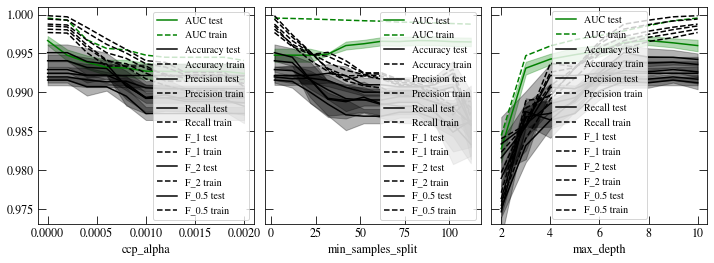

In [6]:
plt.figure(figsize=(4*3, 4))
ax = []
for i, score in enumerate(scores):
    color = 'g' if score == 'AUC' else 'k'
    for j, par in enumerate(results['profile']['mean_test'][score].keys()):
        
        if not i:
            ax.append(plt.subplot(1,len(results['profile']['mean_test'][score].keys()), j+1))
        
        print (par)
        if par == 'hidden_layer_sizes':
            
            x = np.unique([np.sum(results['gs_cv'][f'param_{par}'].data[i]) for i in \
                           range(results['gs_cv'][f'param_{par}'].data.size)])
        
        else:
            x = np.unique(results['gs_cv'][f'param_{par}'].data).astype(np.float)
        
        for t in ['test', 'train']:
            ax[j].plot(x, results['profile'][f'mean_{t:s}'][score][par],
                       color=color, 
                       ls='-' if t == 'test' else '--',
                       label=score + " " + t
                      )
        
            if t == 'test':
                ax[j].fill_between(x, results['profile'][f'mean_{t:s}'][score][par] - \
                                       0.5 * results['profile'][f'std_{t:s}'][score][par],
                                   y2=results['profile'][f'mean_{t:s}'][score][par] + \
                                       0.5 * results['profile'][f'std_{t:s}'][score][par],
                                   color=color,
                                   alpha=0.3)
        
        if not i:
            ax[j].set_xlabel(par)
        else:
            ax[j].legend()
            ax[j].set_ylim(0.973,1.001)
            ax[j].grid()
        if j:
            ax[j].tick_params(labelleft=False)
            
plt.subplots_adjust(wspace = 0.05)
plt.savefig(f"{classifier}_profiles.png", dpi=150)

### plot the parameter profiles

### plot the learning curve

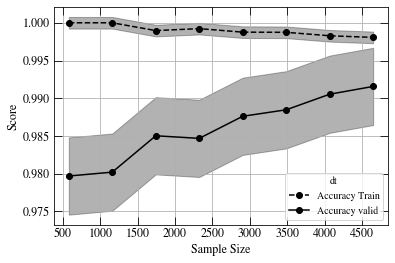

In [7]:
for score, val in results['learning_curve'].items():
    
    if not score == 'Accuracy':
        continue
    
    train_sizes, train_scores, valid_scores = val
    
    plt.plot(train_sizes, train_scores.mean(axis=1),
             marker='o',
             label=score + " Train",
             ls='--',
             color='g' if score == 'AUC' else 'k'
            )
    plt.fill_between(train_sizes,
                     train_scores.mean(axis=1) - np.sqrt(train_scores.var()),
                     y2=train_scores.mean(axis=1) + np.sqrt(train_scores.var()),
                     alpha=0.3,
                     color='g' if score == 'AUC' else 'k',
                     zorder=-1
                    )
    
    plt.plot(train_sizes, valid_scores.mean(axis=1),
             marker='o',
             label=score + " valid", ls='-',
             color= 'g' if score == 'AUC' else 'k',
            )
    plt.fill_between(train_sizes,
                     valid_scores.mean(axis=1) - np.sqrt(valid_scores.var()),
                     y2=valid_scores.mean(axis=1) + np.sqrt(valid_scores.var()),
                     alpha=0.3,
                     color='g' if score == 'AUC' else 'k',
                     zorder=-1
                    )

plt.legend(title=classifier)
plt.grid()
plt.xlabel("Sample Size")
plt.ylabel("Score")
plt.savefig(f"{classifier}_learning_curve.png", dpi=150)

### print the performance on the validation set:

In [8]:
for score, val in results['score_validation'].items():
    print(f"score {score:s} on validation sample is {val:.5f} for {classifier:s}")

score AUC on validation sample is 0.99445 for dt
score Accuracy on validation sample is 0.99036 for dt
score Precision on validation sample is 0.98219 for dt
score Recall on validation sample is 0.99642 for dt
score F_1 on validation sample is 0.99167 for dt
score F_2 on validation sample is 0.99500 for dt
score F_0.5 on validation sample is 0.99096 for dt


Compute expected background rate with observation time and number of fitted pulses in extrinsic sample:

In [9]:
T_obs = 66407.566110
n_tot_bkg_pulses = 2966

In [10]:
bkg_rate = (1. - results['score_validation']['Accuracy']) * n_tot_bkg_pulses / T_obs

print (f"Expected bkg rate of {classifier:s}: {bkg_rate:.5e} Hz")

Expected bkg rate of dt: 4.30344e-04 Hz
